<a href="https://colab.research.google.com/github/SSAC-AI/AI/blob/main/0704_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mission 1.

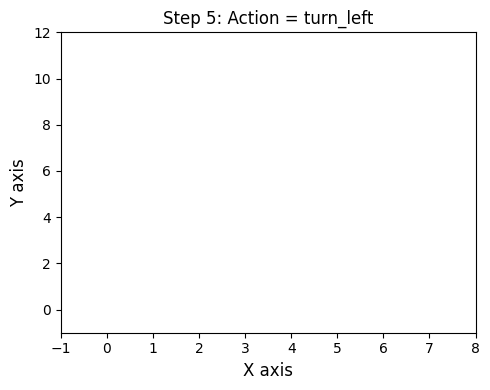

In [5]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    # 캔버스 및 축 설정
    fig, ax = plt.subplots(figsize=(5, 4)) # ax객체를 반환하기 위해서 subplot을 사용
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 라벨 및 제목 설정
    ax.set_xlabel("X axis", fontsize=12)
    ax.set_ylabel("Y axis", fontsize=12)
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)

    # 레이아웃 최적화
    plt.tight_layout()

    return ax # ax객체 반환

if __name__ == "__main__":
    ax = setup_basic_plot(5, "turn_left")
    plt.show()

Mission 2.

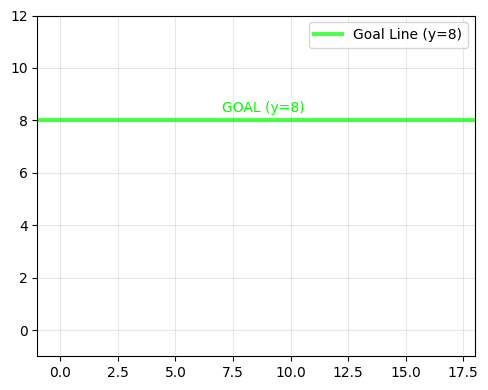

목표선은 y = 8 입니다


In [13]:
def draw_goal_line(obstacles):
    # 캔버스 및 축 설정
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_xlim(-1, 18)
    ax.set_ylim(-1, 12)
    ax.grid(True, alpha=0.3)

    # 목표선 계산
    if obstacles:
        max_y = max(y for _, y in obstacles) # "_," -> x값 제외하고 y값만 추출
    else:
        max_y = 0 # 장애물이 없는 경우 y = 0

    goal_y = max_y + 3 # 최종 목표선 좌표

    # 목표선 그리기
    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")

    # 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', ha='left', va='bottom', fontsize=10)

    # 범례 표시 및 레이아웃 최적화
    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

# 실행값
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
goal_y = draw_goal_line(obstacles) # 함수호출
print("목표선은 y =", goal_y, "입니다")

Mission 3.

Obstacle 1: position=(4, 5)
Obstacle 2: position=(3, 3)
Obstacle 3: position=(3, 2)
Obstacle 4: position=(2, 4)


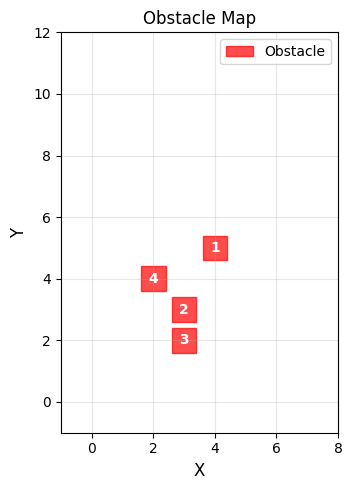

In [17]:
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    # 캔버스 및 축 설정
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)
    ax.set_title("Obstacle Map", fontsize=12)

    # 타입 확인 후 리스트로 변환
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 장애물 그리기
    for idx, (x, y) in enumerate(obstacles):
        # 사각형: 중심 기준으로 좌표 조정
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label="Obstacle" if idx == 0 else None)
        ax.add_patch(rect)

        # 텍스트: 장애물 번호 (흰색, bold)
        ax.text(x, y, str(idx + 1), color='white', weight='bold',
                ha='center', va='center', fontsize=10)

        # 콘솔 출력
        print(f"Obstacle {idx + 1}: position=({x}, {y})")

    # 범례 및 레이아웃
    ax.legend()
    plt.tight_layout()
    plt.show()

# 테스트 실행
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
draw_obstacles(obstacles)

Mission 4.

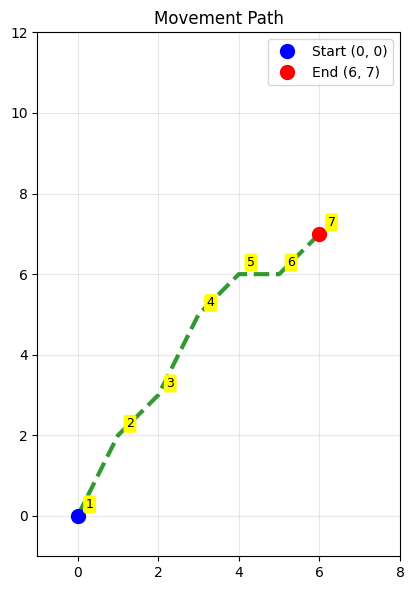

In [25]:
def draw_path(path):
    # 캔버스 및 축 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title("Movement Path", fontsize=12)

    if len(path) >= 2:
        # x, y 좌표 분리 (리스트 컴프리헨션 사용)
        path_x = [x for x, y in path]
        path_y = [y for x, y in path]

        # 경로선 그리기
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8)

    if path:
        # 시작점 (파란색 원)
        start_x, start_y = path[0]
        ax.plot(start_x, start_y, 'bo', markersize=10, label=f"Start ({start_x}, {start_y})")

        # 끝점 (빨간색 원)
        end_x, end_y = path[-1]
        ax.plot(end_x, end_y, 'ro', markersize=10, label=f"End ({end_x}, {end_y})")

    # 점 번호 텍스트 표시
    for idx, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(idx + 1),
                fontsize=9,
                color='black',
                bbox=dict(facecolor='yellow', edgecolor='none', boxstyle='round,pad=0.2'))

    ax.legend()
    plt.tight_layout()
    plt.show()

path = [(0, 0), (1, 2), (2, 3), (3, 5), (4, 6), (5, 6), (6, 7)]
draw_path(path)

Mission 5.

In [ ]:
def draw_sensors(x, y, sensors):
    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.grid(True, alpha=0.3)
    ax.set_title("Sensors", fontsize=12)

    # 차량 위치 (검은색 점)
    ax.plot(x, y, 'ko', markersize=15, label="Vehicle")